## Carregamento

In [2]:
# Importações necessárias
import pandas as pd

# Função para carregar os dados
def carregar_dados(caminho_arquivo, coluna_data=None):
    """
    Carrega um arquivo CSV com dados.
    
    Parâmetros:
    - caminho_arquivo (str): Caminho do arquivo CSV.
    - coluna_data (str, opcional): Nome da coluna de datas para converter para datetime.
    
    Retorna:
    - pandas.DataFrame: DataFrame com os dados carregados.
    """
    # Carrega o CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Converte a coluna de datas para datetime com timezone, se especificada
    if coluna_data:
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)
    
    return dados

# Exemplo de uso da função com coluna de datas 'date'
caminho_arquivo = '../data/processed/uber_stock_data_atualizado.csv'
dados = carregar_dados(caminho_arquivo)

# Exibir as primeiras linhas do DataFrame
dados.head(10)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
5,2019-05-17,41.910000,41.910000,43.290001,41.270000,41.980000,20225700
6,2019-05-20,41.590000,41.590000,41.680000,39.459999,41.189999,29222300
7,2019-05-21,41.500000,41.500000,42.240002,41.250000,42.000000,10802900
8,2019-05-22,41.250000,41.250000,41.279999,40.500000,41.049999,9089500
9,2019-05-23,40.470001,40.470001,41.090000,40.020000,40.799999,11119900


## Colunas/ descrições

In [2]:
# Dicionário com a descrição de cada coluna do DataFrame 'dados'
colunas_descricao = {
    'Date': 'Data do registro',
    'Adj Close': 'Preço ajustado de fechamento',
    'Close': 'Preço de fechamento',
    'High': 'Maior preço do dia',
    'Low': 'Menor preço do dia',
    'Open': 'Preço de abertura',
    'Volume': 'Volume de ações negociadas'
}

# Gerar o relatório amigável
relatorio = "\n".join([f"{coluna}: {descricao}" for coluna, descricao in colunas_descricao.items()])
print(relatorio)

Date: Data do registro
Adj Close: Preço ajustado de fechamento
Close: Preço de fechamento
High: Maior preço do dia
Low: Menor preço do dia
Open: Preço de abertura
Volume: Volume de ações negociadas


## Tendência de Preços ao Longo do Tempo

### Há padrões sazonais ou tendências de crescimento/declínio?

### Use um gráfico de linhas para visualizar a evolução do preço ajustado ao longo do tempo."



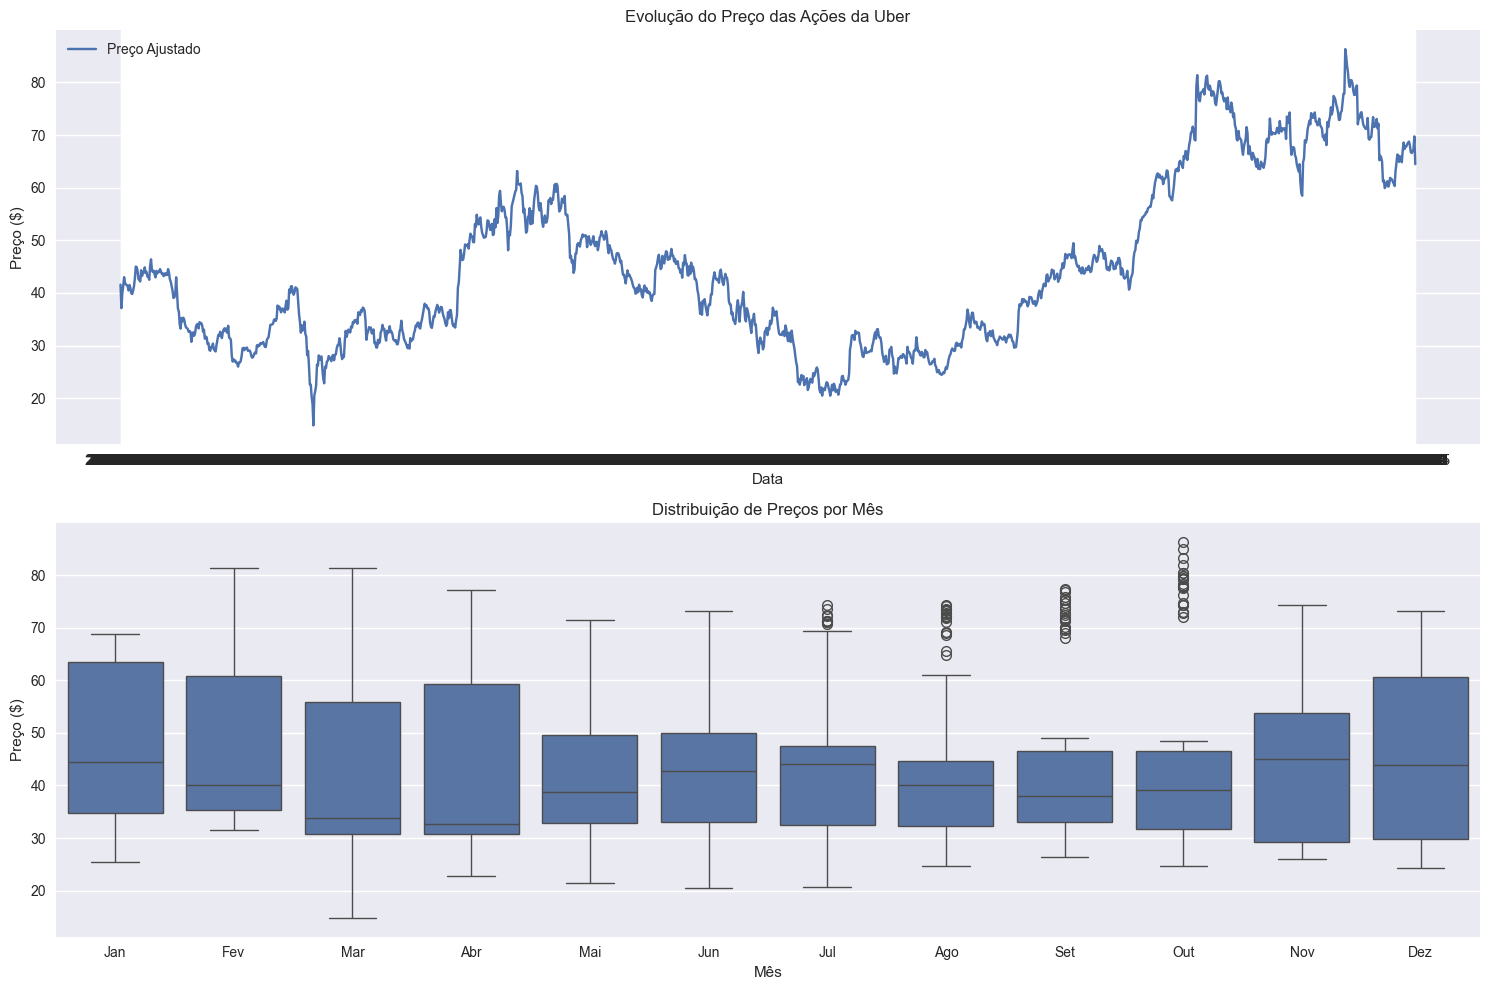


ANÁLISE SIMPLIFICADA DOS PREÇOS DAS AÇÕES DA UBER:


TENDENCIA:
Analisando o histórico de preços das ações da Uber desde 2019:
        - O preço das ações tem crescido ao longo do tempo
        - Começou em torno de $41 em 2019
        - Atualmente está na faixa de $64-70
        - Isso significa que quem investiu no início e manteve até hoje teve um bom retorno

SAZONALIDADE:
Observando os padrões de preços ao longo dos anos:
        - Meses com preços geralmente mais altos: Fevereiro, Janeiro, Dezembro
        - Meses com preços geralmente mais baixos: Maio, Agosto, Setembro
        - Estas variações podem ajudar a decidir os melhores momentos para comprar ou vender

RECOMENDACOES:
- Para iniciantes: Se você acredita no crescimento da Uber, pode ser interessante comprar nos meses de preços mais baixos e manter por longo prazo
- Para investidores ativos: Fique atento aos meses de baixa para comprar e aos meses de alta para vender
- Importante: Além destes padrões, considere sempre no

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_tendencia_precos(dados, coluna_data, coluna_preco, freq='M'):
    # Configuração visual
    plt.style.use('seaborn-v0_8')  # Using a valid style name
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Tendência geral do preço
    plt.subplot(2, 1, 1)
    plt.plot(dados[coluna_data], dados[coluna_preco], label='Preço Ajustado')
    plt.title('Evolução do Preço das Ações da Uber')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    
    # Subplot 2: Boxplot mensal para visualizar sazonalidade
    plt.subplot(2, 1, 2)
    sns.boxplot(x='Mes', y=coluna_preco, data=dados)
    plt.title('Distribuição de Preços por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Preço ($)')
    plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    
    plt.tight_layout()
    plt.show()

    # Análise mensal para identificar padrões sazonais
    dados['Mes'] = pd.to_datetime(dados[coluna_data]).dt.month
    medias_mensais = dados.groupby('Mes')[coluna_preco].mean()
    
    # Identificar meses de alta e baixa
    meses_nomes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    meses_alta = [meses_nomes[i-1] for i in medias_mensais.nlargest(3).index]
    meses_baixa = [meses_nomes[i-1] for i in medias_mensais.nsmallest(3).index]
    
    insights = {
        "tendencia": """
        Analisando o histórico de preços das ações da Uber desde 2019:
        - O preço das ações tem crescido ao longo do tempo
        - Começou em torno de $41 em 2019
        - Atualmente está na faixa de $64-70
        - Isso significa que quem investiu no início e manteve até hoje teve um bom retorno
        """,
        
        "sazonalidade": f"""
        Observando os padrões de preços ao longo dos anos:
        - Meses com preços geralmente mais altos: {', '.join(meses_alta)}
        - Meses com preços geralmente mais baixos: {', '.join(meses_baixa)}
        - Estas variações podem ajudar a decidir os melhores momentos para comprar ou vender
        """,
        
        "recomendacoes": [
            "Para iniciantes: Se você acredita no crescimento da Uber, pode ser interessante comprar nos meses de preços mais baixos e manter por longo prazo",
            "Para investidores ativos: Fique atento aos meses de baixa para comprar e aos meses de alta para vender",
            "Importante: Além destes padrões, considere sempre notícias da empresa e do mercado antes de tomar decisões"
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights = analisar_tendencia_precos(dados, 'Date', 'Adj Close', freq='M')

print("\nANÁLISE SIMPLIFICADA DOS PREÇOS DAS AÇÕES DA UBER:\n")
for categoria, valor in insights.items():
    print(f"\n{categoria.upper()}:")
    if isinstance(valor, list):
        for item in valor:
            print(f"- {item}")
    else:
        print(valor.strip())


## Volatilidade Diária

### Quais dias tiveram a maior volatilidade?

### Crie um gráfico de barras para visualizar a volatilidade ao longo do tempo."

In [10]:
def analisar_volatilidade_diaria(dados, coluna_data, coluna_high, coluna_low, top_n=5, freq='ME'):
    """
    Analisa a volatilidade diária com base nos preços mais altos e mais baixos do dia.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_data (str): Nome da coluna com as datas.
    - coluna_high (str): Nome da coluna com os preços mais altos do dia.
    - coluna_low (str): Nome da coluna com os preços mais baixos do dia.
    - top_n (int): Número de dias com maior volatilidade a serem destacados.
    - freq (str): Frequência para agrupar os dados ('ME' para mensal, 'Y' para anual, etc.).

    Retorna:
    - dict: Insights detalhados sobre a volatilidade diária.
    """
    # Cálculo da volatilidade diária
    dados['Volatilidade'] = dados[coluna_high] - dados[coluna_low]

    # Agrupar os dados pela frequência especificada
    dados[coluna_data] = pd.to_datetime(dados[coluna_data])
    dados_agrupados = dados.resample(freq, on=coluna_data).mean()

    # Identificar os dias com maior volatilidade
    dias_maior_volatilidade = dados.nlargest(top_n, 'Volatilidade')[[coluna_data, 'Volatilidade']]

    # Estatísticas descritivas da volatilidade
    estatisticas_volatilidade = dados['Volatilidade'].describe()

    # Construção de insights detalhados
    insights = {
        "resumo": f"""
        A volatilidade diária foi calculada com base na diferença entre os preços mais altos (High) e mais baixos (Low) de cada dia.
        A média da volatilidade diária é de ${estatisticas_volatilidade['mean']:.2f}, com um desvio padrão de ${estatisticas_volatilidade['std']:.2f}.
        O menor valor de volatilidade registrado foi de ${estatisticas_volatilidade['min']:.2f}, enquanto o maior foi de ${estatisticas_volatilidade['max']:.2f}.
        """,
        "dias_maior_volatilidade": dias_maior_volatilidade.to_dict(orient='records'),
        "detalhes": f"""
        Estatísticas adicionais:
        - Mediana da volatilidade: ${estatisticas_volatilidade['50%']:.2f}
        - Primeiro quartil (Q1): ${estatisticas_volatilidade['25%']:.2f}
        - Terceiro quartil (Q3): ${estatisticas_volatilidade['75%']:.2f}
        - Total de dias analisados: {len(dados)}
        """,
        "recomendacoes": [
            "Dias com alta volatilidade podem indicar oportunidades para investidores ativos que buscam lucrar com oscilações rápidas.",
            "Para investidores mais conservadores, é importante evitar operar em dias de alta volatilidade, pois os riscos são maiores.",
            "Monitorar notícias e eventos externos que possam impactar o mercado é essencial para antecipar dias de alta volatilidade."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_volatilidade = analisar_volatilidade_diaria(dados, 'Date', 'High', 'Low')

print("\nINSIGHTS SOBRE A VOLATILIDADE DIÁRIA:\n")
print(insights_volatilidade["resumo"])
print("\nDETALHES ADICIONAIS:")
print(insights_volatilidade["detalhes"])
print("\nDIAS COM MAIOR VOLATILIDADE:")
for dia in insights_volatilidade["dias_maior_volatilidade"]:
    print(f"- Data: {dia['Date']}, Volatilidade: ${dia['Volatilidade']:.2f}")
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_volatilidade["recomendacoes"]:
    print(f"- {recomendacao}")



INSIGHTS SOBRE A VOLATILIDADE DIÁRIA:


        A volatilidade diária foi calculada com base na diferença entre os preços mais altos (High) e mais baixos (Low) de cada dia.
        A média da volatilidade diária é de $1.64, com um desvio padrão de $0.83.
        O menor valor de volatilidade registrado foi de $0.39, enquanto o maior foi de $7.75.
        

DETALHES ADICIONAIS:

        Estatísticas adicionais:
        - Mediana da volatilidade: $1.43
        - Primeiro quartil (Q1): $1.10
        - Terceiro quartil (Q3): $2.00
        - Total de dias analisados: 1444
        

DIAS COM MAIOR VOLATILIDADE:
- Data: 2024-12-05 00:00:00, Volatilidade: $7.75
- Data: 2021-04-29 00:00:00, Volatilidade: $6.11
- Data: 2020-03-19 00:00:00, Volatilidade: $5.56
- Data: 2021-03-04 00:00:00, Volatilidade: $5.55
- Data: 2024-08-06 00:00:00, Volatilidade: $5.32

RECOMENDAÇÕES:
- Dias com alta volatilidade podem indicar oportunidades para investidores ativos que buscam lucrar com oscilações rápidas.
-

## Relação entre Volume e Preço de Fechamento

### Há uma correlação entre o volume negociado e o preço de fechamento?

### Calcule a correlação e visualize em um gráfico de dispersão."

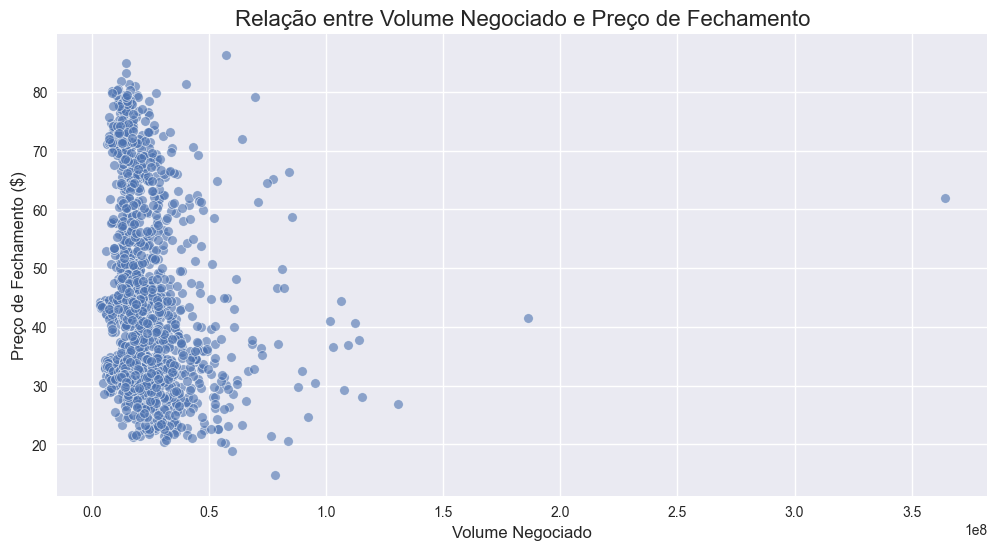


INSIGHTS SOBRE A RELAÇÃO ENTRE VOLUME E PREÇO DE FECHAMENTO:


        A análise da relação entre o volume negociado e o preço de fechamento revelou os seguintes pontos:
        - Correlação de Pearson: -0.17 (p-valor: 0.0000)
        - Correlação de Spearman: -0.28 (p-valor: 0.0000)
        - Estatísticas descritivas do Volume:
          - Média: 24298002.88
          - Mediana: 20369650.00
          - Máximo: 364231800.00
          - Mínimo: 3380000.00
        - Estatísticas descritivas do Preço de Fechamento:
          - Média: 44.47
          - Mediana: 41.36
          - Máximo: 86.34
          - Mínimo: 14.82
        

INTERPRETAÇÃO:

        A correlação de Pearson mede a relação linear entre o volume negociado e o preço de fechamento.
        Já a correlação de Spearman avalia a relação monotônica entre as variáveis.
        - Valores próximos de 1 indicam uma forte correlação positiva.
        - Valores próximos de -1 indicam uma forte correlação negativa.
        - Valores pr

In [12]:
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt

def analisar_relacao_volume_preco(dados, coluna_volume, coluna_preco):
    """
    Analisa a relação entre o volume negociado e o preço de fechamento.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_volume (str): Nome da coluna com o volume negociado.
    - coluna_preco (str): Nome da coluna com o preço de fechamento.

    Retorna:
    - dict: Insights detalhados sobre a relação entre volume e preço de fechamento.
    """
    # Verificar se as colunas existem no DataFrame
    if coluna_volume not in dados.columns or coluna_preco not in dados.columns:
        raise ValueError("As colunas especificadas não existem no DataFrame.")

    # Estatísticas descritivas
    estatisticas_volume = dados[coluna_volume].describe()
    estatisticas_preco = dados[coluna_preco].describe()

    # Calcular a correlação de Pearson e Spearman
    correlacao_pearson, p_valor_pearson = pearsonr(dados[coluna_volume], dados[coluna_preco])
    correlacao_spearman, p_valor_spearman = spearmanr(dados[coluna_volume], dados[coluna_preco])

    # Criar gráfico de dispersão
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=dados[coluna_volume], y=dados[coluna_preco], alpha=0.6)
    plt.title("Relação entre Volume Negociado e Preço de Fechamento", fontsize=16)
    plt.xlabel("Volume Negociado", fontsize=12)
    plt.ylabel("Preço de Fechamento ($)", fontsize=12)
    plt.grid(True)
    plt.show()

    # Insights detalhados
    insights = {
        "resumo": f"""
        A análise da relação entre o volume negociado e o preço de fechamento revelou os seguintes pontos:
        - Correlação de Pearson: {correlacao_pearson:.2f} (p-valor: {p_valor_pearson:.4f})
        - Correlação de Spearman: {correlacao_spearman:.2f} (p-valor: {p_valor_spearman:.4f})
        - Estatísticas descritivas do Volume:
          - Média: {estatisticas_volume['mean']:.2f}
          - Mediana: {estatisticas_volume['50%']:.2f}
          - Máximo: {estatisticas_volume['max']:.2f}
          - Mínimo: {estatisticas_volume['min']:.2f}
        - Estatísticas descritivas do Preço de Fechamento:
          - Média: {estatisticas_preco['mean']:.2f}
          - Mediana: {estatisticas_preco['50%']:.2f}
          - Máximo: {estatisticas_preco['max']:.2f}
          - Mínimo: {estatisticas_preco['min']:.2f}
        """,
        "interpretacao": """
        A correlação de Pearson mede a relação linear entre o volume negociado e o preço de fechamento.
        Já a correlação de Spearman avalia a relação monotônica entre as variáveis.
        - Valores próximos de 1 indicam uma forte correlação positiva.
        - Valores próximos de -1 indicam uma forte correlação negativa.
        - Valores próximos de 0 indicam pouca ou nenhuma correlação.
        """,
        "recomendacoes": [
            "Se a correlação for significativa, considere monitorar o volume negociado como um indicador para prever movimentos no preço de fechamento.",
            "Realize análises adicionais para identificar fatores externos que possam influenciar tanto o volume quanto o preço.",
            "Considere criar modelos preditivos que incluam o volume como uma variável explicativa para o preço de fechamento."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_relacao = analisar_relacao_volume_preco(dados, 'Volume', 'Close')

print("\nINSIGHTS SOBRE A RELAÇÃO ENTRE VOLUME E PREÇO DE FECHAMENTO:\n")
print(insights_relacao["resumo"])
print("\nINTERPRETAÇÃO:")
print(insights_relacao["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_relacao["recomendacoes"]:
    print(f"- {recomendacao}")

## Diferença entre Abertura e Fechamento

### Em quantos dias o preço de fechamento foi maior que o de abertura?

### Crie um histograma para mostrar a distribuição das diferenças."

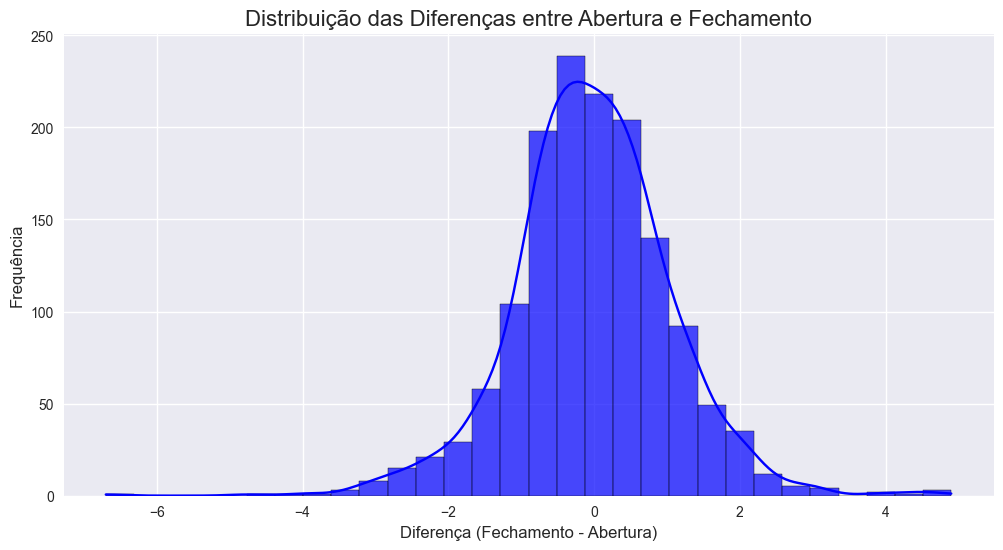


INSIGHTS SOBRE A DIFERENÇA ENTRE ABERTURA E FECHAMENTO:


        A análise da diferença entre os preços de abertura e fechamento revelou os seguintes pontos:
        - Em 691 dias, o preço de fechamento foi maior que o de abertura.
        - Estatísticas descritivas da diferença:
          - Média: -0.03
          - Mediana: -0.05
          - Máximo: 4.90
          - Mínimo: -6.70
        

INTERPRETAÇÃO:

        A diferença entre os preços de abertura e fechamento pode indicar o sentimento do mercado ao longo do dia.
        - Diferenças positivas sugerem que o mercado estava otimista, com os preços subindo ao longo do dia.
        - Diferenças negativas indicam que o mercado estava pessimista, com os preços caindo ao longo do dia.
        

RECOMENDAÇÕES:
- Monitorar os dias com grandes diferenças para identificar possíveis eventos ou notícias que impactaram o mercado.
- Utilizar a análise da diferença como um indicador para estratégias de day trading.
- Considerar a inclusão de o

In [13]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_diferenca_abertura_fechamento(dados, coluna_abertura, coluna_fechamento):
    """
    Analisa a diferença entre os preços de abertura e fechamento de ações.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_abertura (str): Nome da coluna com os preços de abertura.
    - coluna_fechamento (str): Nome da coluna com os preços de fechamento.

    Retorna:
    - dict: Insights detalhados sobre a diferença entre abertura e fechamento.
    """
    # Verificar se as colunas existem no DataFrame
    if coluna_abertura not in dados.columns or coluna_fechamento not in dados.columns:
        raise ValueError("As colunas especificadas não existem no DataFrame.")

    # Calcular a diferença entre fechamento e abertura
    dados['Diferenca'] = dados[coluna_fechamento] - dados[coluna_abertura]

    # Contar os dias em que o fechamento foi maior que a abertura
    dias_fechamento_maior = (dados['Diferenca'] > 0).sum()

    # Estatísticas descritivas da diferença
    estatisticas_diferenca = dados['Diferenca'].describe()

    # Criar histograma da distribuição das diferenças
    plt.figure(figsize=(12, 6))
    sns.histplot(dados['Diferenca'], bins=30, kde=True, color='blue', alpha=0.7)
    plt.title("Distribuição das Diferenças entre Abertura e Fechamento", fontsize=16)
    plt.xlabel("Diferença (Fechamento - Abertura)", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.grid(True)
    plt.show()

    # Construir insights detalhados
    insights = {
        "resumo": f"""
        A análise da diferença entre os preços de abertura e fechamento revelou os seguintes pontos:
        - Em {dias_fechamento_maior} dias, o preço de fechamento foi maior que o de abertura.
        - Estatísticas descritivas da diferença:
          - Média: {estatisticas_diferenca['mean']:.2f}
          - Mediana: {estatisticas_diferenca['50%']:.2f}
          - Máximo: {estatisticas_diferenca['max']:.2f}
          - Mínimo: {estatisticas_diferenca['min']:.2f}
        """,
        "interpretacao": """
        A diferença entre os preços de abertura e fechamento pode indicar o sentimento do mercado ao longo do dia.
        - Diferenças positivas sugerem que o mercado estava otimista, com os preços subindo ao longo do dia.
        - Diferenças negativas indicam que o mercado estava pessimista, com os preços caindo ao longo do dia.
        """,
        "recomendacoes": [
            "Monitorar os dias com grandes diferenças para identificar possíveis eventos ou notícias que impactaram o mercado.",
            "Utilizar a análise da diferença como um indicador para estratégias de day trading.",
            "Considerar a inclusão de outras variáveis, como volume negociado, para entender melhor os fatores que influenciam essas diferenças."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_diferenca = analisar_diferenca_abertura_fechamento(dados, 'Open', 'Close')

print("\nINSIGHTS SOBRE A DIFERENÇA ENTRE ABERTURA E FECHAMENTO:\n")
print(insights_diferenca["resumo"])
print("\nINTERPRETAÇÃO:")
print(insights_diferenca["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_diferenca["recomendacoes"]:
    print(f"- {recomendacao}")

## Impacto do Volume na Volatilidade

### Dias com maior volume têm maior volatilidade?

### Use um gráfico de dispersão para visualizar essa relação."

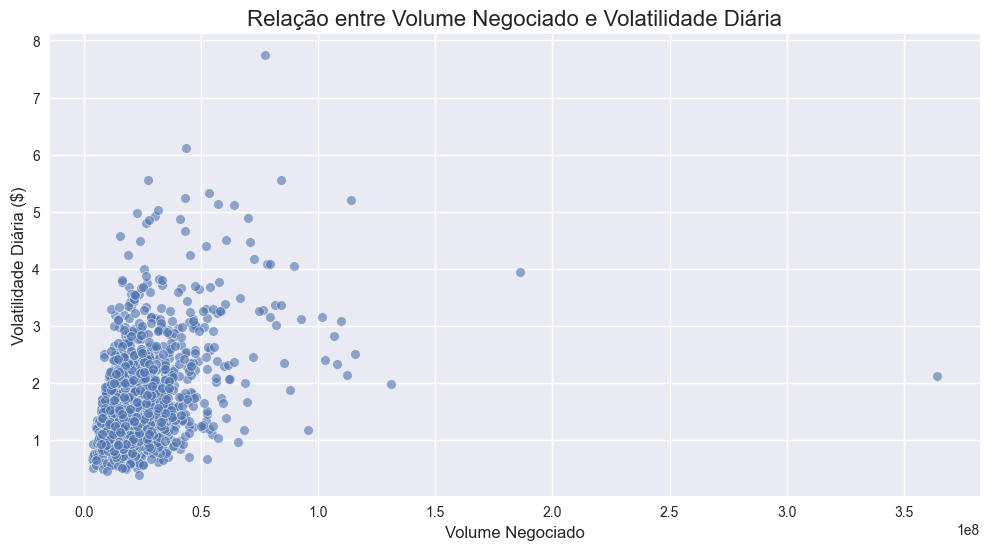


INSIGHTS SOBRE O IMPACTO DO VOLUME NA VOLATILIDADE DIÁRIA:


        A análise da relação entre o volume negociado e a volatilidade diária revelou os seguintes pontos:
        - Correlação de Pearson: 0.39 (p-valor: 0.0000)
        - Correlação de Spearman: 0.36 (p-valor: 0.0000)
        - Estatísticas descritivas do Volume:
          - Média: 24298002.88
          - Mediana: 20369650.00
          - Máximo: 364231800.00
          - Mínimo: 3380000.00
        - Estatísticas descritivas da Volatilidade:
          - Média: 1.64
          - Mediana: 1.43
          - Máximo: 7.75
          - Mínimo: 0.39
        

INTERPRETAÇÃO:

        A correlação de Pearson mede a relação linear entre o volume negociado e a volatilidade diária.
        Já a correlação de Spearman avalia a relação monotônica entre as variáveis.
        - Valores próximos de 1 indicam uma forte correlação positiva.
        - Valores próximos de -1 indicam uma forte correlação negativa.
        - Valores próximos de 0 ind

In [14]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt

def analisar_impacto_volume_volatilidade(dados, coluna_volume, coluna_high, coluna_low):
    """
    Analisa o impacto do volume negociado na volatilidade diária.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_volume (str): Nome da coluna com o volume negociado.
    - coluna_high (str): Nome da coluna com os preços mais altos do dia.
    - coluna_low (str): Nome da coluna com os preços mais baixos do dia.

    Retorna:
    - dict: Insights detalhados sobre a relação entre volume e volatilidade.
    """
    # Verificar se as colunas existem no DataFrame
    if coluna_volume not in dados.columns or coluna_high not in dados.columns or coluna_low not in dados.columns:
        raise ValueError("As colunas especificadas não existem no DataFrame.")

    # Calcular a volatilidade diária
    dados['Volatilidade'] = dados[coluna_high] - dados[coluna_low]

    # Estatísticas descritivas
    estatisticas_volume = dados[coluna_volume].describe()
    estatisticas_volatilidade = dados['Volatilidade'].describe()

    # Calcular a correlação entre volume e volatilidade
    correlacao_pearson, p_valor_pearson = pearsonr(dados[coluna_volume], dados['Volatilidade'])
    correlacao_spearman, p_valor_spearman = spearmanr(dados[coluna_volume], dados['Volatilidade'])

    # Criar gráfico de dispersão
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=dados[coluna_volume], y=dados['Volatilidade'], alpha=0.6)
    plt.title("Relação entre Volume Negociado e Volatilidade Diária", fontsize=16)
    plt.xlabel("Volume Negociado", fontsize=12)
    plt.ylabel("Volatilidade Diária ($)", fontsize=12)
    plt.grid(True)
    plt.show()

    # Insights detalhados
    insights = {
        "resumo": f"""
        A análise da relação entre o volume negociado e a volatilidade diária revelou os seguintes pontos:
        - Correlação de Pearson: {correlacao_pearson:.2f} (p-valor: {p_valor_pearson:.4f})
        - Correlação de Spearman: {correlacao_spearman:.2f} (p-valor: {p_valor_spearman:.4f})
        - Estatísticas descritivas do Volume:
          - Média: {estatisticas_volume['mean']:.2f}
          - Mediana: {estatisticas_volume['50%']:.2f}
          - Máximo: {estatisticas_volume['max']:.2f}
          - Mínimo: {estatisticas_volume['min']:.2f}
        - Estatísticas descritivas da Volatilidade:
          - Média: {estatisticas_volatilidade['mean']:.2f}
          - Mediana: {estatisticas_volatilidade['50%']:.2f}
          - Máximo: {estatisticas_volatilidade['max']:.2f}
          - Mínimo: {estatisticas_volatilidade['min']:.2f}
        """,
        "interpretacao": """
        A correlação de Pearson mede a relação linear entre o volume negociado e a volatilidade diária.
        Já a correlação de Spearman avalia a relação monotônica entre as variáveis.
        - Valores próximos de 1 indicam uma forte correlação positiva.
        - Valores próximos de -1 indicam uma forte correlação negativa.
        - Valores próximos de 0 indicam pouca ou nenhuma correlação.
        """,
        "recomendacoes": [
            "Se a correlação for significativa, considere monitorar o volume negociado como um indicador para prever dias de alta volatilidade.",
            "Realize análises adicionais para identificar fatores externos que possam influenciar tanto o volume quanto a volatilidade.",
            "Considere criar estratégias de investimento que levem em conta a relação entre volume e volatilidade, como evitar operar em dias de alta volatilidade para reduzir riscos."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_volume_volatilidade = analisar_impacto_volume_volatilidade(dados, 'Volume', 'High', 'Low')

print("\nINSIGHTS SOBRE O IMPACTO DO VOLUME NA VOLATILIDADE DIÁRIA:\n")
print(insights_volume_volatilidade["resumo"])
print("\nINTERPRETAÇÃO:")
print(insights_volume_volatilidade["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_volume_volatilidade["recomendacoes"]:
    print(f"- {recomendacao}")

## Média Móvel do Preço de Fechamento

### Como a média móvel se compara ao preço atual?

### Plote as médias móveis junto com o preço de fechamento em um gráfico de linhas."

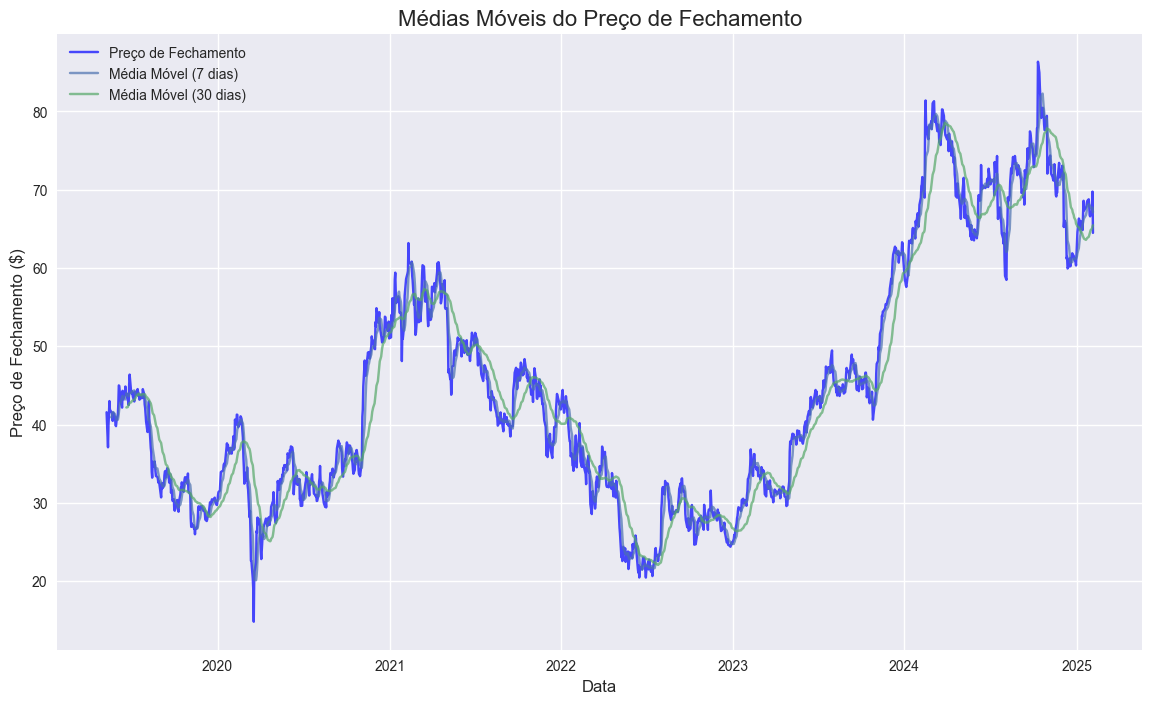


INSIGHTS SOBRE AS MÉDIAS MÓVEIS DO PREÇO DE FECHAMENTO:


        A análise das médias móveis revelou os seguintes pontos:
        - Preço atual de fechamento: $64.48
        - Média móvel de 7 dias: $67.11
        - Média móvel de 30 dias: $65.45
        

INTERPRETAÇÃO:

        As médias móveis são indicadores importantes para identificar tendências de curto e longo prazo:
        - A média móvel de 7 dias reflete a tendência de curto prazo, sendo mais sensível a mudanças recentes.
        - A média móvel de 30 dias reflete a tendência de longo prazo, suavizando flutuações diárias.
        - Quando o preço atual está acima das médias móveis, pode indicar uma tendência de alta.
        - Quando o preço atual está abaixo das médias móveis, pode indicar uma tendência de baixa.
        

RECOMENDAÇÕES:
- Se o preço atual estiver consistentemente acima das médias móveis, pode ser um bom momento para manter ou comprar ações.
- Se o preço atual estiver consistentemente abaixo das médias m

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

def analisar_media_movel(dados, coluna_preco, medias=[7, 30]):
    """
    Analisa a média móvel de preços de fechamento e compara com o preço atual.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_preco (str): Nome da coluna com os preços de fechamento.
    - medias (list): Lista de períodos para cálculo das médias móveis.

    Retorna:
    - dict: Insights detalhados sobre as médias móveis e sua relação com o preço atual.
    """
    # Verificar se a coluna existe no DataFrame
    if coluna_preco not in dados.columns:
        raise ValueError(f"A coluna '{coluna_preco}' não existe no DataFrame.")

    # Garantir que os dados estão ordenados por data
    if not pd.api.types.is_datetime64_any_dtype(dados['Date']):
        raise ValueError("A coluna 'Date' deve estar no formato datetime.")
    dados = dados.sort_values(by='Date')

    # Calcular as médias móveis
    for periodo in medias:
        dados[f'Media_Movel_{periodo}'] = dados[coluna_preco].rolling(window=periodo).mean()

    # Obter o preço atual e as médias móveis mais recentes
    preco_atual = dados[coluna_preco].iloc[-1]
    medias_atuais = {f'Media_Movel_{periodo}': dados[f'Media_Movel_{periodo}'].iloc[-1] for periodo in medias}

    # Criar o gráfico de linhas
    plt.figure(figsize=(14, 8))
    plt.plot(dados['Date'], dados[coluna_preco], label='Preço de Fechamento', color='blue', alpha=0.7)
    for periodo in medias:
        plt.plot(dados['Date'], dados[f'Media_Movel_{periodo}'], label=f'Média Móvel ({periodo} dias)', alpha=0.7)
    plt.title("Médias Móveis do Preço de Fechamento", fontsize=16)
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Preço de Fechamento ($)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Construir insights detalhados
    insights = {
        "resumo": f"""
        A análise das médias móveis revelou os seguintes pontos:
        - Preço atual de fechamento: ${preco_atual:.2f}
        - Média móvel de 7 dias: ${medias_atuais['Media_Movel_7']:.2f}
        - Média móvel de 30 dias: ${medias_atuais['Media_Movel_30']:.2f}
        """,
        "interpretacao": """
        As médias móveis são indicadores importantes para identificar tendências de curto e longo prazo:
        - A média móvel de 7 dias reflete a tendência de curto prazo, sendo mais sensível a mudanças recentes.
        - A média móvel de 30 dias reflete a tendência de longo prazo, suavizando flutuações diárias.
        - Quando o preço atual está acima das médias móveis, pode indicar uma tendência de alta.
        - Quando o preço atual está abaixo das médias móveis, pode indicar uma tendência de baixa.
        """,
        "recomendacoes": [
            "Se o preço atual estiver consistentemente acima das médias móveis, pode ser um bom momento para manter ou comprar ações.",
            "Se o preço atual estiver consistentemente abaixo das médias móveis, pode ser um sinal de alerta para vender ou evitar novas compras.",
            "Combine a análise de médias móveis com outros indicadores, como volume negociado e volatilidade, para tomar decisões mais informadas.",
            "Monitore regularmente as médias móveis para identificar mudanças nas tendências do mercado."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_media_movel = analisar_media_movel(dados, 'Close')

print("\nINSIGHTS SOBRE AS MÉDIAS MÓVEIS DO PREÇO DE FECHAMENTO:\n")
print(insights_media_movel["resumo"])
print("\nINTERPRETAÇÃO:")
print(insights_media_movel["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_media_movel["recomendacoes"]:
    print(f"- {recomendacao}")

## Distribuição dos Preços de Abertura e Fechamento

### Há uma diferença significativa entre as distribuições?

### Use boxplots para comparar as distribuições."

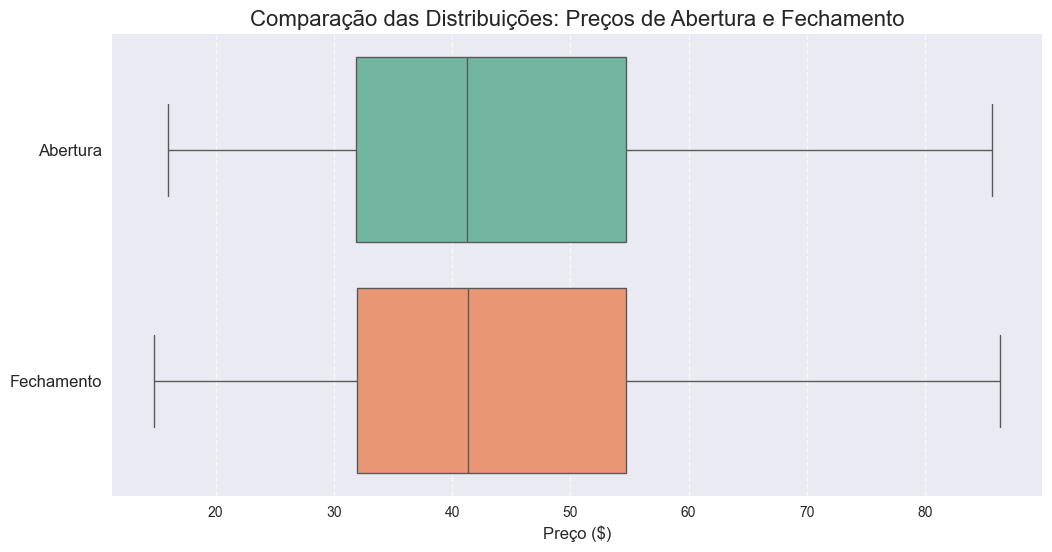


INSIGHTS SOBRE A DISTRIBUIÇÃO DOS PREÇOS DE ABERTURA E FECHAMENTO:


        A análise das distribuições dos preços de abertura e fechamento revelou os seguintes pontos:
        - Estatísticas descritivas do preço de abertura:
          - Média: $44.49
          - Mediana: $41.22
          - Máximo: $85.64
          - Mínimo: $15.96
        - Estatísticas descritivas do preço de fechamento:
          - Média: $44.47
          - Mediana: $41.36
          - Máximo: $86.34
          - Mínimo: $14.82
        

TESTES ESTATÍSTICOS:

        Testes estatísticos realizados para comparar as distribuições:
        - Teste t de Student (para médias): 
          - Estatística t: 0.05
          - p-valor: 0.9621
        - Teste de Mann-Whitney (para distribuições não paramétricas):
          - Estatística U: 1042983.50
          - p-valor: 0.9852
        

INTERPRETAÇÃO:

        - Se o p-valor dos testes for menor que 0.05, há evidências estatísticas de que as distribuições
          dos preços 

In [16]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

import matplotlib.pyplot as plt

def analisar_distribuicao_precos(dados, coluna_abertura, coluna_fechamento):
    """
    Analisa a distribuição dos preços de abertura e fechamento, comparando as distribuições
    e identificando diferenças significativas.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_abertura (str): Nome da coluna com os preços de abertura.
    - coluna_fechamento (str): Nome da coluna com os preços de fechamento.

    Retorna:
    - dict: Insights detalhados sobre as distribuições e possíveis diferenças.
    """
    # Verificar se as colunas existem no DataFrame
    if coluna_abertura not in dados.columns or coluna_fechamento not in dados.columns:
        raise ValueError("As colunas especificadas não existem no DataFrame.")

    # Estatísticas descritivas
    estatisticas_abertura = dados[coluna_abertura].describe()
    estatisticas_fechamento = dados[coluna_fechamento].describe()

    # Testes estatísticos para comparar as distribuições
    t_stat, p_valor_ttest = ttest_ind(dados[coluna_abertura], dados[coluna_fechamento], equal_var=False)
    u_stat, p_valor_mannwhitney = mannwhitneyu(dados[coluna_abertura], dados[coluna_fechamento])

    # Criar boxplots para comparar as distribuições
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dados[[coluna_abertura, coluna_fechamento]], orient='h', palette="Set2")
    plt.title("Comparação das Distribuições: Preços de Abertura e Fechamento", fontsize=16)
    plt.xlabel("Preço ($)", fontsize=12)
    plt.yticks([0, 1], ["Abertura", "Fechamento"], fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Construir insights detalhados
    insights = {
        "resumo": f"""
        A análise das distribuições dos preços de abertura e fechamento revelou os seguintes pontos:
        - Estatísticas descritivas do preço de abertura:
          - Média: ${estatisticas_abertura['mean']:.2f}
          - Mediana: ${estatisticas_abertura['50%']:.2f}
          - Máximo: ${estatisticas_abertura['max']:.2f}
          - Mínimo: ${estatisticas_abertura['min']:.2f}
        - Estatísticas descritivas do preço de fechamento:
          - Média: ${estatisticas_fechamento['mean']:.2f}
          - Mediana: ${estatisticas_fechamento['50%']:.2f}
          - Máximo: ${estatisticas_fechamento['max']:.2f}
          - Mínimo: ${estatisticas_fechamento['min']:.2f}
        """,
        "testes_estatisticos": f"""
        Testes estatísticos realizados para comparar as distribuições:
        - Teste t de Student (para médias): 
          - Estatística t: {t_stat:.2f}
          - p-valor: {p_valor_ttest:.4f}
        - Teste de Mann-Whitney (para distribuições não paramétricas):
          - Estatística U: {u_stat:.2f}
          - p-valor: {p_valor_mannwhitney:.4f}
        """,
        "interpretacao": """
        - Se o p-valor dos testes for menor que 0.05, há evidências estatísticas de que as distribuições
          dos preços de abertura e fechamento são significativamente diferentes.
        - Diferenças nas distribuições podem indicar variações no comportamento do mercado ao longo do dia,
          como otimismo ou pessimismo dos investidores.
        """,
        "recomendacoes": [
            "Se houver diferenças significativas, considere investigar os fatores que influenciam essas variações, como notícias ou eventos econômicos.",
            "Utilize essas informações para ajustar estratégias de investimento, como identificar padrões de alta ou baixa ao longo do dia.",
            "Combine a análise das distribuições com outros indicadores, como volume negociado e volatilidade, para obter uma visão mais completa do mercado."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_distribuicao = analisar_distribuicao_precos(dados, 'Open', 'Close')

print("\nINSIGHTS SOBRE A DISTRIBUIÇÃO DOS PREÇOS DE ABERTURA E FECHAMENTO:\n")
print(insights_distribuicao["resumo"])
print("\nTESTES ESTATÍSTICOS:")
print(insights_distribuicao["testes_estatisticos"])
print("\nINTERPRETAÇÃO:")
print(insights_distribuicao["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_distribuicao["recomendacoes"]:
    print(f"- {recomendacao}")

## Relação entre Preço de Abertura e Máximo do Dia

### Em quantos dias o preço máximo foi significativamente maior que o preço de abertura?

### Calcule a diferença percentual e visualize em um gráfico de barras."

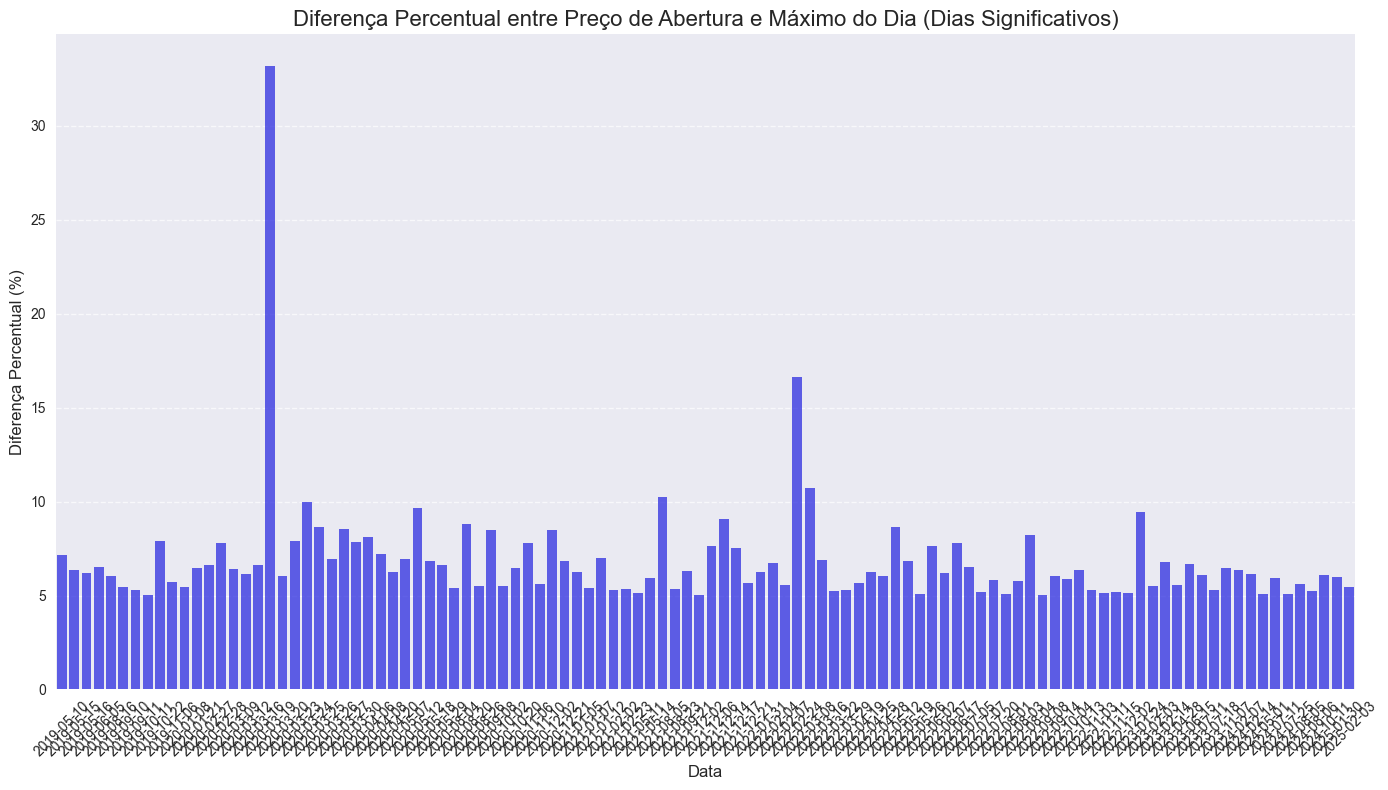


INSIGHTS SOBRE A RELAÇÃO ENTRE PREÇO DE ABERTURA E MÁXIMO DO DIA:


        A análise da relação entre o preço de abertura e o maior preço do dia revelou os seguintes pontos:
        - Total de dias analisados: 1444
        - Total de dias com diferença significativa (> 5%): 106
        - Estatísticas descritivas da diferença percentual:
          - Média: 1.95%
          - Mediana: 1.43%
          - Máximo: 33.21%
          - Mínimo: 0.00%
        

INTERPRETAÇÃO:

        - Dias com diferenças percentuais significativas (> 5%) indicam momentos em que o mercado
          apresentou alta volatilidade ou otimismo, resultando em um aumento expressivo no preço máximo em relação ao preço de abertura.
        - Diferenças menores podem indicar estabilidade ou baixa volatilidade no mercado.
        

RECOMENDAÇÕES:
- Monitorar os dias com grandes diferenças percentuais para identificar possíveis eventos ou notícias que impactaram o mercado.
- Utilizar a análise da diferença percentual como 

In [17]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

def analisar_relacao_abertura_maximo(dados, coluna_abertura, coluna_maximo, limite_percentual=5):
    """
    Analisa a relação entre o preço de abertura e o maior preço do dia, identificando dias em que
    o preço máximo foi significativamente maior que o preço de abertura.

    Parâmetros:
    - dados (pd.DataFrame): DataFrame contendo os dados de mercado.
    - coluna_abertura (str): Nome da coluna com os preços de abertura.
    - coluna_maximo (str): Nome da coluna com os maiores preços do dia.
    - limite_percentual (float): Percentual mínimo para considerar a diferença como significativa.

    Retorna:
    - dict: Insights detalhados sobre a relação entre o preço de abertura e o maior preço do dia.
    """
    # Verificar se as colunas existem no DataFrame
    if coluna_abertura not in dados.columns or coluna_maximo not in dados.columns:
        raise ValueError("As colunas especificadas não existem no DataFrame.")

    # Calcular a diferença percentual entre o preço máximo e o preço de abertura
    dados['Diferenca_Percentual'] = ((dados[coluna_maximo] - dados[coluna_abertura]) / dados[coluna_abertura]) * 100

    # Identificar os dias em que a diferença foi significativamente maior que o limite percentual
    dias_significativos = dados[dados['Diferenca_Percentual'] > limite_percentual]

    # Estatísticas descritivas da diferença percentual
    estatisticas_diferenca = dados['Diferenca_Percentual'].describe()

    # Criar gráfico de barras para visualizar as diferenças percentuais
    plt.figure(figsize=(14, 8))
    sns.barplot(x=dias_significativos['Date'], y=dias_significativos['Diferenca_Percentual'], color='blue', alpha=0.7)
    plt.title("Diferença Percentual entre Preço de Abertura e Máximo do Dia (Dias Significativos)", fontsize=16)
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Diferença Percentual (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Construir insights detalhados
    insights = {
        "resumo": f"""
        A análise da relação entre o preço de abertura e o maior preço do dia revelou os seguintes pontos:
        - Total de dias analisados: {len(dados)}
        - Total de dias com diferença significativa (> {limite_percentual}%): {len(dias_significativos)}
        - Estatísticas descritivas da diferença percentual:
          - Média: {estatisticas_diferenca['mean']:.2f}%
          - Mediana: {estatisticas_diferenca['50%']:.2f}%
          - Máximo: {estatisticas_diferenca['max']:.2f}%
          - Mínimo: {estatisticas_diferenca['min']:.2f}%
        """,
        "interpretacao": f"""
        - Dias com diferenças percentuais significativas (> {limite_percentual}%) indicam momentos em que o mercado
          apresentou alta volatilidade ou otimismo, resultando em um aumento expressivo no preço máximo em relação ao preço de abertura.
        - Diferenças menores podem indicar estabilidade ou baixa volatilidade no mercado.
        """,
        "recomendacoes": [
            "Monitorar os dias com grandes diferenças percentuais para identificar possíveis eventos ou notícias que impactaram o mercado.",
            "Utilizar a análise da diferença percentual como um indicador para estratégias de curto prazo, como day trading.",
            "Investidores conservadores podem preferir operar em dias com menor volatilidade, enquanto investidores mais agressivos podem buscar oportunidades em dias de alta volatilidade.",
            "Combine essa análise com outros indicadores, como volume negociado e médias móveis, para obter uma visão mais completa do mercado."
        ]
    }

    return insights

# Chamada da função e exibição dos insights
insights_abertura_maximo = analisar_relacao_abertura_maximo(dados, 'Open', 'High')

print("\nINSIGHTS SOBRE A RELAÇÃO ENTRE PREÇO DE ABERTURA E MÁXIMO DO DIA:\n")
print(insights_abertura_maximo["resumo"])
print("\nINTERPRETAÇÃO:")
print(insights_abertura_maximo["interpretacao"])
print("\nRECOMENDAÇÕES:")
for recomendacao in insights_abertura_maximo["recomendacoes"]:
    print(f"- {recomendacao}")